In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
num_classes = 6
img_rows, img_cols = 224, 224
batch_size = 32

train_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\training'
validation_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\validation'
testing_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\testing'

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 3384 images belonging to 6 classes.
Found 584 images belonging to 6 classes.
Found 139 images belonging to 6 classes.


In [4]:
mobile = keras.applications.mobilenet.MobileNet()

In [5]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

In [6]:
model=Model(inputs=base_model.input,outputs=preds)

In [7]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [8]:
opt = SGD(lr=1e-4)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
import tensorflow as tf

In [10]:
callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                          min_delta=0,
                                          patience=6,
                                          verbose=1,
                                          mode='auto',
                                          restore_best_weights=True)

In [11]:
history = model.fit(x=train_generator, 
                 validation_data=validation_generator,
                 epochs=200,
                 verbose=1,
                 callbacks=[callback])

Epoch 1/200
106/106 [==============================] - 533s 5s/step - loss: 1.8241 - accuracy: 0.1749 - val_loss: 1.8226 - val_accuracy: 0.1969
Epoch 2/200
106/106 [==============================] - 533s 5s/step - loss: 1.7442 - accuracy: 0.2408 - val_loss: 1.7937 - val_accuracy: 0.2106
Epoch 3/200
106/106 [==============================] - 494s 5s/step - loss: 1.6892 - accuracy: 0.3079 - val_loss: 1.7629 - val_accuracy: 0.2414
Epoch 4/200
106/106 [==============================] - 488s 5s/step - loss: 1.6522 - accuracy: 0.3658 - val_loss: 1.7294 - val_accuracy: 0.2997
Epoch 5/200
106/106 [==============================] - 488s 5s/step - loss: 1.6077 - accuracy: 0.4232 - val_loss: 1.6985 - val_accuracy: 0.3716
Epoch 6/200
106/106 [==============================] - 500s 5s/step - loss: 1.5707 - accuracy: 0.4687 - val_loss: 1.6692 - val_accuracy: 0.4110
Epoch 7/200
106/106 [==============================] - 490s 5s/step - loss: 1.5337 - accuracy: 0.5086 - val_loss: 1.6416 - val_accuracy:

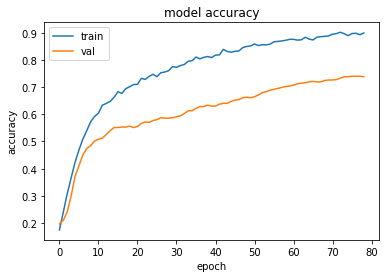

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

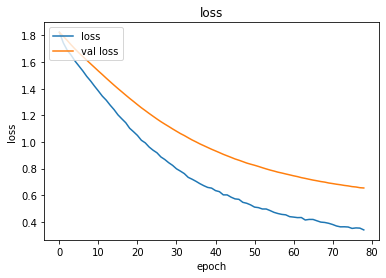

In [13]:
acc = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import pandas as pd

In [15]:
# ambil label true kelas di data training
y_true = test_generator.classes

# ambil label hasil prediksi (index maksimum, secara kolom)
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# performa model di 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.70      0.83      0.76        23
           2       0.74      0.96      0.83        26
           3       1.00      0.33      0.50        24
           4       0.65      0.87      0.74        23
           5       0.73      0.52      0.61        21

    accuracy                           0.73       139
   macro avg       0.76      0.72      0.70       139
weighted avg       0.76      0.73      0.71       139



In [16]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename_axis('Actual').rename_axis('Predicted', axis=1)
cm

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,18,4,0,0,0,0
1,2,19,1,0,0,1
2,0,1,25,0,0,0
3,0,0,5,8,9,2
4,0,0,2,0,20,1
5,4,3,1,0,2,11


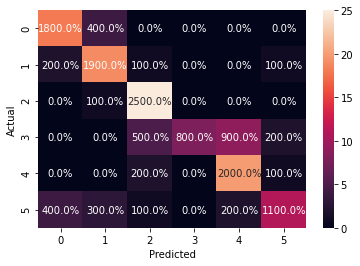

In [17]:
sns.heatmap(cm, annot=True, fmt=".1%")